## The data analysis below uses Airbnb data of San Francisco in March 2018

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Read SF listings from March 2018 csv file to a Pandas DataFrame
url_listing = '/Users/forheart/Dropbox/Data Scientist/Capstone Project 1/2018_march_listings.csv.gz'
df = pd.read_csv(url_listing, sep=',')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Step 1: Drop non-relavant or redundant or not useful or all NaN columns to predictive machine learning
df = df.drop(columns=['id', 'listing_url', 'scrape_id', 'last_scraped', 'experiences_offered', 'thumbnail_url', 'medium_url', 'picture_url', 
'xl_picture_url', 'host_url', 'host_name', 'host_location', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_since',
'host_neighbourhood', 'host_total_listings_count', 'host_verifications', 'street', 'neighbourhood', 'weekly_price', 'monthly_price', 'square_feet',
'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'host_response_time', 
'longitude', 'calendar_last_scraped', 'jurisdiction_names', 'has_availability', 'first_review', 'last_review', 'license', 'host_id', 'calendar_updated',])

In [5]:
df.dtypes.value_counts()

object     31
float64    11
int64      11
dtype: int64

In [6]:
# Create only numeric columns right now
numerics = ['int64', 'float64']

In [7]:
# Create a list of column names for columns that might be categorical
Category = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'property_type', 'room_type',
          'bed_type', 'requires_license', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 
          'require_guest_profile_picture', 'require_guest_phone_verification', 'neighbourhood_cleansed']

In [8]:
# Define the lambda function: categorize_label
categorize= lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[Category] = df[Category].apply(categorize, axis=0)

# Print the converted dtypes
print(df[Category].dtypes)

host_is_superhost                   category
host_has_profile_pic                category
host_identity_verified              category
is_location_exact                   category
property_type                       category
room_type                           category
bed_type                            category
requires_license                    category
instant_bookable                    category
is_business_travel_ready            category
cancellation_policy                 category
require_guest_profile_picture       category
require_guest_phone_verification    category
neighbourhood_cleansed              category
dtype: object


In [9]:
# Create a list of column names for columns that are binary categorical.
binary_cat = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'requires_license', 
              'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification']

for column in binary_cat:
    df[column] = df[column].map({'t': 1, 'f': 0})

In [10]:
df['bed_type'] = df['bed_type'].eq('Real Bed').mul(1)

In [11]:
df.dtypes.value_counts()

int64       18
object      17
float64     14
category     1
category     1
category     1
category     1
dtype: int64

In [12]:
# Now all categorical columns can be converted to numerical columns by using the get_dummies method
numerics = ['int64', 'float64', 'category']
df_num = df.select_dtypes(include=numerics)
df_others = df.select_dtypes(exclude=numerics)

In [13]:
df_num.columns

Index(['host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [14]:
df_others.columns

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'host_about', 'host_response_rate', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people'],
      dtype='object')

In [15]:
# We can see that in the "object" dtype columns, there are still many numerical columns that were stored as strings. So I am 
# converting these columns to numerical columns as well.

strtonum = ['price', 'security_deposit', 'cleaning_fee','extra_people']
for column in strtonum:
    df[column] = df[column].str.replace('$', '')
    df[column] = df[column].str.replace(',', '')
    df[column] = df[column].astype(float)

In [16]:
df['host_response_rate'] = df['host_response_rate'].str.strip('%').astype('float')/100

In [17]:
df.dtypes.value_counts()

float64     19
int64       18
object      12
category     1
category     1
category     1
category     1
dtype: int64

In [18]:
df_num = df.select_dtypes(include=numerics)

In [19]:
# Take a look at the df_others again, they are all text data, we will save the names of these text columns for later use.
TEXT = ['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'host_about', 'amenities']

In [20]:
df_num.isnull().sum()

host_response_rate                   394
host_is_superhost                     28
host_listings_count                   28
host_has_profile_pic                  28
host_identity_verified                28
neighbourhood_cleansed                 0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                             23
bedrooms                               0
beds                                   6
bed_type                               0
price                                  0
security_deposit                    1129
cleaning_fee                         477
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
availability_30                        0
availability_60                        0
availability_90                        0
availability_365

### There are many missing values in the numerical + categorical dataframe. For numerical columns, we can replace NaN in some columns with 0, some with 1, and in other columns with the mean of that column.

In [21]:
df_num.loc[:,'host_listings_count'] = df_num['host_listings_count'].fillna(value=1, inplace=False)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
fillna_col = ['host_response_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'bathrooms',
       'security_deposit', 'cleaning_fee', 'reviews_per_month', 'beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                  'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
df_num[fillna_col] = df_num[fillna_col].fillna(value=0, inplace=False)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [23]:
# Now there is non missing values in the df_num dataframe.

df_num.isnull().sum()

host_response_rate                  0
host_is_superhost                   0
host_listings_count                 0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_cleansed              0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
price                               0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
availability_30                     0
availability_60                     0
availability_90                     0
availability_365                    0
number_of_reviews                   0
review_score

In [24]:
# Combine some of the neighbourhoods into larger realestate distrcits
# Open neighbourhood CSV 
link = '/Users/forheart/Dropbox/Data Scientist/Capstone Project 1/Districts.csv'
df_district = pd.read_csv(link, index_col=False)
df_district.head()

,neighbourhood,government district,real estate districts
0,Bayview,10,10.0
1,Bernal Heights,9,9.0
2,Castro/Upper Market,8,5.0
3,Chinatown,3,8.0
4,Crocker Amazon,11,10.0


In [25]:
# This dataframe shows what the real estate districts each neighbourhood is in.

# There are 11 official government districts, and 10 inofficial real estate districts.
df_district = df_district.dropna(axis=0, how='any')
df_district['government district'] = df_district['government district'].astype(str)
df_num['neighbourhood'] = df_num['neighbourhood_cleansed']
df_num = pd.merge(df_district, df_num, on='neighbourhood')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
df_num = df_num.drop(columns = ['neighbourhood', 'neighbourhood_cleansed', 'real estate districts'])

df_num = df_num.rename(columns={'government district':'district'})

In [27]:
df_num['district'] = df_num['district'].astype('category')

In [28]:
df_with_dummies = pd.get_dummies(df_num, columns = ['district', 'property_type', 'room_type', 'cancellation_policy'] )

In [29]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4804 entries, 0 to 4803
Data columns (total 82 columns):
host_response_rate                     4804 non-null float64
host_is_superhost                      4804 non-null float64
host_listings_count                    4804 non-null float64
host_has_profile_pic                   4804 non-null float64
host_identity_verified                 4804 non-null float64
is_location_exact                      4804 non-null int64
accommodates                           4804 non-null int64
bathrooms                              4804 non-null float64
bedrooms                               4804 non-null int64
beds                                   4804 non-null float64
bed_type                               4804 non-null int64
price                                  4804 non-null float64
security_deposit                       4804 non-null float64
cleaning_fee                           4804 non-null float64
guests_included                        4804 non

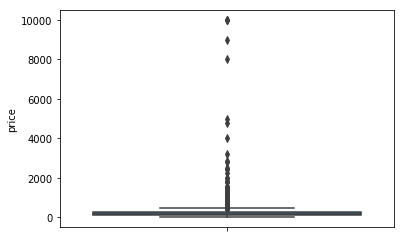

In [30]:
sns.boxplot(y='price', data=df_with_dummies)

### The plots show that there are many outliers in the distribution of the target variable price.

In [31]:
# Get rid of the outliers.
percentile = np.percentile(df_with_dummies.price, [2.5, 97.5])
newdf = df_with_dummies[(df_with_dummies.price > percentile[0]) & (df_with_dummies.price < percentile[1])]

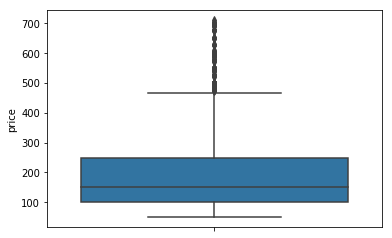

In [32]:
sns.boxplot(y='price', data=newdf)

In [33]:
# Create a simple model first, using linear regression
# Use the numerical features only for now
X = newdf.drop('price', axis=1).values
y = newdf['price'].values

In [34]:
# Split into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Linear Regression

In [35]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [36]:
lr = linear_model.LinearRegression()

In [37]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
lr.score(X_train, y_train)

0.6208807394542979

In [39]:
y_pred = lr.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [41]:
lr.score(X_test, y_test)

0.6032808278384353

In [42]:
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 78.2210596223126


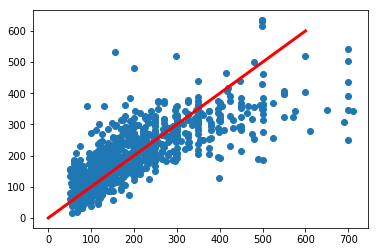

In [43]:
plt.scatter(y_test, y_pred)
plt.plot([0,600], [0, 600], linewidth=3, color='red')
plt.show()

In [44]:
# try 5-fold cross-validation
from sklearn.model_selection import cross_val_score

In [45]:
cv_score = cross_val_score(lr, X_train, y_train, cv=5)
cv_score

array([ 5.81749066e-01, -1.95235986e+08, -9.91971380e+01,  5.79184500e-01,
        5.69884226e-01])

In [46]:
np.mean(cv_score)

-39047216.71290827

In [47]:
# Try regularized regression: Lasso Regression
from sklearn.linear_model import Lasso

In [48]:
lasso = Lasso(alpha=0.5, normalize=True)
lasso.fit(X_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
lasso_coef = lasso.coef_

In [50]:
df_feature = newdf.drop('price', axis=1)

In [51]:
# Using lasso coefficients to select the most important features
df_feature.columns.values[np.abs(lasso_coef) != 0]

array(['accommodates', 'cleaning_fee', 'room_type_Entire home/apt'],
      dtype=object)

### Lasso coefficients showed that the number of people the listing accommodates, cleaning_fee, and whether it is an entire home are the three most important features.

In [52]:
y_pred = lasso.predict(X_test)

In [53]:
lasso.score(X_train, y_train)

0.3943132869019632

In [54]:
lasso.score(X_test, y_test)

0.41851422580091696

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

94.70036382325938

### GridSearchCV

In [56]:
# hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

In [57]:
alpha_space = np.logspace(-2, 2, num=5)
param_grid = {'alpha': alpha_space}

In [58]:
grid = GridSearchCV(lasso, param_grid, cv=None)

In [59]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
y_pred = grid.predict(X_test)

In [61]:
grid.score(X_train, y_train)

0.16232466606625207

In [62]:
grid.score(X_test, y_test)

0.17587197633383722

In [63]:
mean_squared_error(y_test, y_pred)

12710.390184809718

In [64]:
grid.best_params_

{'alpha': 1.0}

### Ridge Regression

In [65]:
# Try Ridge regression 
from sklearn.linear_model import Ridge

In [66]:

alpha_space = np.logspace(-4, 0, 5)
ridge_scores = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

for alpha in alpha_space:
    ridge.alpha = alpha
    ridge.fit(X_train, y_train)
    ridge_score = ridge.score(X_train, y_train)
    ridge_scores.append(ridge_score)

In [67]:
ridge_scores

[0.6208804083488221,
 0.6208516317207772,
 0.6197111735659914,
 0.6102259113117985,
 0.5518822167317572]

In [68]:
# The highest score was seen with alpha = 10E-4
ridge = Ridge(normalize=True, alpha=0.0001)

In [69]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [70]:
y_pred = ridge.predict(X_test)

In [71]:
ridge.score(X_test, y_test)

0.6035121937212682

In [72]:
cv_score = cross_val_score(ridge, X_train, y_train, cv=5)
cv_score

array([ 5.82195526e-01, -1.95212065e+08, -1.16664652e+01,  5.78963101e-01,
        5.70681667e-01])

### ElasticNet

In [73]:
# Try ElasticNet
from sklearn.linear_model import ElasticNet

In [74]:
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)

In [75]:
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
elastic_net.score(X_train, y_train)

0.5330979471302912

In [77]:
y_pred = elastic_net.predict(X_test)
elastic_net.score(X_test, y_test)

0.53769244883401